In [1]:
#	Append the path to the GECKO project root directory
import sys
sys.path.append('..')
from config.config import GCN_KAFKA_CONFIG

# Skymap Handle

In [2]:
from astropy.table import QTable
from astropy import units as u
import astropy_healpix as ah
import numpy as np

In [3]:
skymap = QTable.read('../data/bayestar.multiorder.fits')

## The most probable sky location

In [4]:
i = np.argmax(skymap['PROBDENSITY'])
uniq = skymap[i]['UNIQ']
skymap[i]['PROBDENSITY'].to_value(u.deg**-2)
# 0.07825164701914111

0.07825164701914111

In [5]:
level, ipix = ah.uniq_to_level_ipix(uniq)
nside = ah.level_to_nside(level)

In [6]:
ra, dec = ah.healpix_to_lonlat(ipix, nside, order='nested')
ra.deg, dec.deg
# 194.30419921874997, -17.856895095545468

(194.30419921874997, -17.856895095545468)

In [7]:
#	NGC 4993
ra = 197.4133 * u.deg
dec = -23.3996 * u.deg


In [8]:
level, ipix = ah.uniq_to_level_ipix(skymap['UNIQ'])
nside = ah.level_to_nside(level)
match_ipix = ah.lonlat_to_healpix(ra, dec, nside, order='nested')


In [9]:
i = np.flatnonzero(ipix == match_ipix)[0]
i
# 13484


13484

In [10]:
skymap[i]['PROBDENSITY'].to_value(u.deg**-2)
# 0.034679190989078075

0.034679190989078075

# Find the 90% Probability Region

In [11]:
skymap.sort('PROBDENSITY', reverse=True)


In [12]:
level, ipix = ah.uniq_to_level_ipix(skymap['UNIQ'])
pixel_area = ah.nside_to_pixel_area(ah.level_to_nside(level))


In [13]:
prob = pixel_area * skymap['PROBDENSITY']


In [14]:
cumprob = np.cumsum(prob)


In [15]:
i = cumprob.searchsorted(0.9)


In [16]:
area_90 = pixel_area[:i].sum()
area_90.to_value(u.deg**2)
# 30.975181093574633

30.975181093574633

# Read bayestar.fits

In [17]:
import healpy as hp

In [18]:
from ligo.skymap.io.fits import read_sky_map
from ligo.skymap.postprocess import crossmatch

In [19]:
path_healpix = '../data/bayestar.multiorder.fits'
#	moc=True --> multiorder healpix
skymap = read_sky_map(path_healpix, moc=True)

In [20]:
from astropy.table import Table
from astropy.coordinates import SkyCoord


In [21]:
try:
    print(len(cat))
except:
	cat = Table.read('../data/GLADE+.fits')

In [22]:
cat.rename_column('col9', '_RAJ2000')
cat.rename_column('col10', '_DEJ2000')
cat.rename_column('col33', 'Dist')


In [23]:
coordinates = SkyCoord(cat['_RAJ2000']*u.deg, cat['_DEJ2000']*u.deg, cat['Dist']*u.Mpc)

In [24]:
result = crossmatch(skymap, coordinates)

In [25]:
cat[result.searched_prob_vol < 0.9]

col1,col2,col3,col4,col5,col6,col7,col8,_RAJ2000,_DEJ2000,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,Dist,col34,col35,col36,col37,col38,col39,col40
int32,int32,bytes28,bytes29,bytes16,bytes19,bytes18,bytes1,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float32,int16,float64,float32,float64,float64,int16,float64,float64,float64,float64,int16,float32,float32,int16,float32,float32
1151111,44313,NGC4830,NGC4830,12572790-1941286,J125727.91-194128.4,--,G,194.366257,-19.691298,12.961,--,0,-20.5102,9.911,0.016,9.184,0.018,8.942,0.026,9.868,--,9.909,--,0,--,--,0.0112,0.0110688303775976,1,0.0003688615364088,0.0003248,49.459035,1.662404,3,3.4,0.4,0,4.9,0.9
1151235,45466,NGC4970,NGC4970,13073375-2400309,J130733.72-240030.6,--,G,196.89064,-24.008606,12.802,--,0,-20.5923,10.129,0.012,9.455,0.017,9.17,0.02,9.778,--,9.829,--,0,--,--,0.01086,0.0106864422989425,1,0.0004215690983688,0.00031494,47.736632,1.898942,3,3.5,0.4,0,4.9,0.9
1151336,45657,NGC4993,NGC4993,13094770-2323017,J130947.70-232302.2,--,G,197.448776,-23.383831,13.16,--,0,-19.9044,10.292,0.015,9.599,0.022,9.33,0.026,9.943,--,9.987,--,0,--,--,0.00968,0.0091909380476333,1,0.0003670109076353,0.00028072,41.00982,1.649432,3,2.2,0.3,0,4.7,0.9
1151752,45408,IC4180,IC4180,13065651-2355014,J130656.52-235501.2,--,G,196.735474,-23.91707,13.252,--,0,-19.8445,10.67,0.016,9.976,0.023,9.694,0.027,10.193,--,10.16,--,0,--,--,0.00985,0.0093266175439474,1,0.0003748390540044,0.00028565,41.619489,1.684965,3,1.1,0.5,1,4.3,0.9
1151925,45426,NGC4968,NGC4968,13070597-2340373,J130705.93-234036.2,--,G,196.774902,-23.67704,13.435,--,0,-19.6616,10.862,0.019,10.039,0.021,9.798,0.024,9.993,--,9.102,--,0,--,--,0.00983,0.0093271139991327,1,0.0003668177724407,0.00028507,41.62172,1.648899,3,1.3,0.6,1,4.4,0.9
1156123,46199,ESO508-033,ESO508-033,13162322-2633415,J131623.28-263341,--,G,199.096786,-26.561554,14.424,--,0,-18.9347,11.881,0.025,11.195,0.04,10.877,0.048,10.898,--,10.688,--,0,--,--,0.01089,0.010514251662497,1,0.000351238867207,0.00031581,46.961349,1.581653,3,0.7,0.3,--,4.1,0.9
1159426,45241,ESO575-053,ESO575-053,13050493-2223022,J130504.91-222302.1,--,G,196.270554,-22.383947,14.136,--,0,-18.5881,12.205,0.027,11.449,0.04,11.255,0.062,11.979,--,11.925,--,0,--,--,0.00848,0.0078656267437873,1,0.000317500683812,0.00024592,35.06111,1.424037,3,0.15,0.07,1,3.3,0.8
1159936,45475,ESO508-010,ESO508-010,13073773-2334441,J130737.71-233444.3,--,G,196.907242,-23.57892,14.216,--,0,-19.1012,12.272,0.043,11.503,0.052,11.303,0.088,11.884,--,11.815,--,0,--,--,0.01057,0.0103169593512125,1,0.0003563561159478,0.00030653,46.073292,1.60423,3,0.3,0.1,1,3.7,0.8
1164528,--,--,--,13104593-2351566,J131045.95-235156.6,--,G,197.691406,-23.865728,14.873958,0.05871,1,-18.1446,12.568,0.05,11.932,0.077,11.622,0.097,12.609,0.024,12.606,0.026,0,14.461,0.06,0.00956,0.0089999967423863,1,0.0003348323826678,0.00015,40.152044,1.504348,3,0.11,0.05,1,3.2,0.8


(<matplotlib.image.AxesImage at 0x2bd50d610>, <Mollview: >)

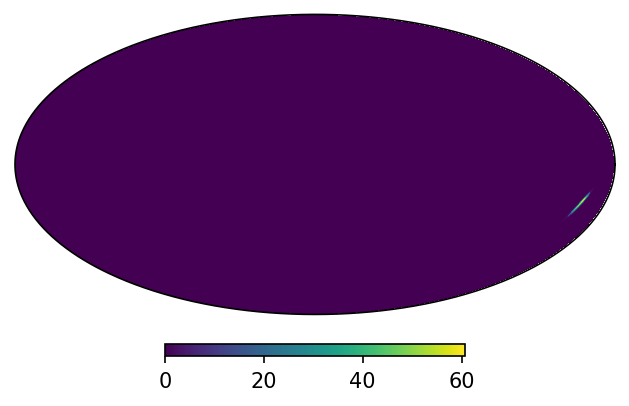

In [54]:
from mhealpy import HealpixMap
m = HealpixMap.read_map('../data/bayestar.multiorder.fits')

m.plot()